# Desafio - Vaga de Estágio Driva

**Objetivo:** <br>
Fazer um web scraping do máximo de vagas de emprego abertas que você conseguir no site https://portal.gupy.io/ e fazer uma análise sobre os dados.

Autor: *Danillo de Souza Pereira* <br>
LinkedIn: https://www.linkedin.com/in/danillosouza03/

In [1]:
# Importando bibliotecas 
import pandas as pd 
from unidecode import unidecode
import matplotlib.pyplot as plt

In [2]:
# Lendo e vendo as 5 primeiras e últimas linhas
df = pd.read_csv('base_dados_vagas.csv', encoding='utf-8', sep=';')
df

,empresa,cargo,localizacao,modalidade,contrato,pcd,data
0,Imagem Geosistemas,1349 - Analista de Dados Júnior,Sao Jose d... - SP,Presencial,Efetivo,Também p/ PcD,28/08/2023
1,Verdegreen Hotel,Banco de Dados - Unipê,João Pessoa - PB,Presencial,Banco de Talentos,Também p/ PcD,25/08/2023
2,Grupo Boticário,Analista ll – Dados e insights (Afirmativa par...,Sao Jose d... - PR,Presencial,Temporário,Não informado,25/08/2023
3,Central IT,ADMINISTRADOR DE BANCO DE DADOS SÊNIOR,Não informado,Presencial,Efetivo,Também p/ PcD,25/08/2023
4,GVC SOLUÇÕES EM COBRANÇA,ANALISTA DE DADOS,São José d... - SP,Presencial,Efetivo,Também p/ PcD,25/08/2023
...,...,...,...,...,...,...,...
582,Qexpert,Banco de Talentos Cientista de Dados,Curitiba - PR,Remoto,Banco de Talentos,Também p/ PcD,18/03/2021
583,Sicredi,Banco de Dados Jovem Aprendiz - Dracena/SP,Dracena - SP,Presencial,Banco de Talentos,Também p/ PcD,11/03/2021
584,Nestlé,Engenheiro(a) de Dados,São Paulo - SP,Presencial,Efetivo,Também p/ PcD,01/03/2021
585,Qualidados,Não encontrou uma vaga com seu perfil? Cadastr...,Não informado,Presencial,Banco de Talentos,Também p/ PcD,29/05/2020


In [3]:
# Separando cidade e estado para melhorar a análise
df[['cidade', 'estado']] = df['localizacao'].str.split(' - ', expand=True)

# Apagando localização completa
df.drop(columns=['localizacao'], inplace=True)
df

,empresa,cargo,modalidade,contrato,pcd,data,cidade,estado
0,Imagem Geosistemas,1349 - Analista de Dados Júnior,Presencial,Efetivo,Também p/ PcD,28/08/2023,Sao Jose d...,SP
1,Verdegreen Hotel,Banco de Dados - Unipê,Presencial,Banco de Talentos,Também p/ PcD,25/08/2023,João Pessoa,PB
2,Grupo Boticário,Analista ll – Dados e insights (Afirmativa par...,Presencial,Temporário,Não informado,25/08/2023,Sao Jose d...,PR
3,Central IT,ADMINISTRADOR DE BANCO DE DADOS SÊNIOR,Presencial,Efetivo,Também p/ PcD,25/08/2023,Não informado,None
4,GVC SOLUÇÕES EM COBRANÇA,ANALISTA DE DADOS,Presencial,Efetivo,Também p/ PcD,25/08/2023,São José d...,SP
...,...,...,...,...,...,...,...,...
582,Qexpert,Banco de Talentos Cientista de Dados,Remoto,Banco de Talentos,Também p/ PcD,18/03/2021,Curitiba,PR
583,Sicredi,Banco de Dados Jovem Aprendiz - Dracena/SP,Presencial,Banco de Talentos,Também p/ PcD,11/03/2021,Dracena,SP
584,Nestlé,Engenheiro(a) de Dados,Presencial,Efetivo,Também p/ PcD,01/03/2021,São Paulo,SP
585,Qualidados,Não encontrou uma vaga com seu perfil? Cadastr...,Presencial,Banco de Talentos,Também p/ PcD,29/05/2020,Não informado,None


In [4]:
# observando os tipos de dados e se tem dados faltantes
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   empresa     587 non-null    object
 1   cargo       587 non-null    object
 2   modalidade  587 non-null    object
 3   contrato    587 non-null    object
 4   pcd         587 non-null    object
 5   data        587 non-null    object
 6   cidade      587 non-null    object
 7   estado      526 non-null    object
dtypes: object(8)
memory usage: 36.8+ KB


In [5]:
# Tirando acentos e padranizando caixa de texto 
def remove_acentos(cidade):
    return unidecode(cidade).title()

df['cidade'] = df['cidade'].apply(remove_acentos)
df['cargo'] = df['cargo'].apply(remove_acentos)
df

,empresa,cargo,modalidade,contrato,pcd,data,cidade,estado
0,Imagem Geosistemas,1349 - Analista De Dados Junior,Presencial,Efetivo,Também p/ PcD,28/08/2023,Sao Jose D...,SP
1,Verdegreen Hotel,Banco De Dados - Unipe,Presencial,Banco de Talentos,Também p/ PcD,25/08/2023,Joao Pessoa,PB
2,Grupo Boticário,Analista Ll - Dados E Insights (Afirmativa Par...,Presencial,Temporário,Não informado,25/08/2023,Sao Jose D...,PR
3,Central IT,Administrador De Banco De Dados Senior,Presencial,Efetivo,Também p/ PcD,25/08/2023,Nao Informado,None
4,GVC SOLUÇÕES EM COBRANÇA,Analista De Dados,Presencial,Efetivo,Também p/ PcD,25/08/2023,Sao Jose D...,SP
...,...,...,...,...,...,...,...,...
582,Qexpert,Banco De Talentos Cientista De Dados,Remoto,Banco de Talentos,Também p/ PcD,18/03/2021,Curitiba,PR
583,Sicredi,Banco De Dados Jovem Aprendiz - Dracena/Sp,Presencial,Banco de Talentos,Também p/ PcD,11/03/2021,Dracena,SP
584,Nestlé,Engenheiro(A) De Dados,Presencial,Efetivo,Também p/ PcD,01/03/2021,Sao Paulo,SP
585,Qualidados,Nao Encontrou Uma Vaga Com Seu Perfil? Cadastr...,Presencial,Banco de Talentos,Também p/ PcD,29/05/2020,Nao Informado,None


In [6]:
df.describe()

,empresa,cargo,modalidade,contrato,pcd,data,cidade,estado
count,587,587,587,587,587,587,587,526
unique,307,482,2,9,2,155,71,20
top,Itaú Unibanco,Analista De Dados,Presencial,Efetivo,Também p/ PcD,18/08/2023,Sao Paulo,SP
freq,22,18,398,461,454,21,215,288


In [7]:
# Apagando a coluna de data
df.drop(columns=['data'], inplace=True)

### Distribuição de Vagas por Estado
Ao analisar os 10 estados com o maior número de vagas, constatamos que a região Sudeste domina as ofertas de emprego, com São Paulo liderando, seguido por Rio de Janeiro e Minas Gerais.

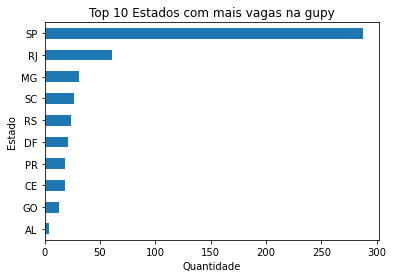

In [8]:
# Mostrando os 10 estados com mais vagas abertas na gupy
df['estado'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Quantidade')
plt.ylabel('Estado')
plt.title('Top 10 Estados com mais vagas na gupy')
plt.savefig('graficos/Top10EstadosVagas.png', facecolor='white')
plt.show()

### Tipos de Contratos Mais Comuns
Em uma base de 587 vagas, notamos que mais de 400 delas são para cargos efetivos, isso sinaliza uma alta demanda por profissionais qualificados e de longo prazo. Além disso, identificamos um grande número de vagas com contratos de Banco de Talentos e Estágio, indicando que as empresas estão investindo em novos talentos e em formar equipes diversificadas.

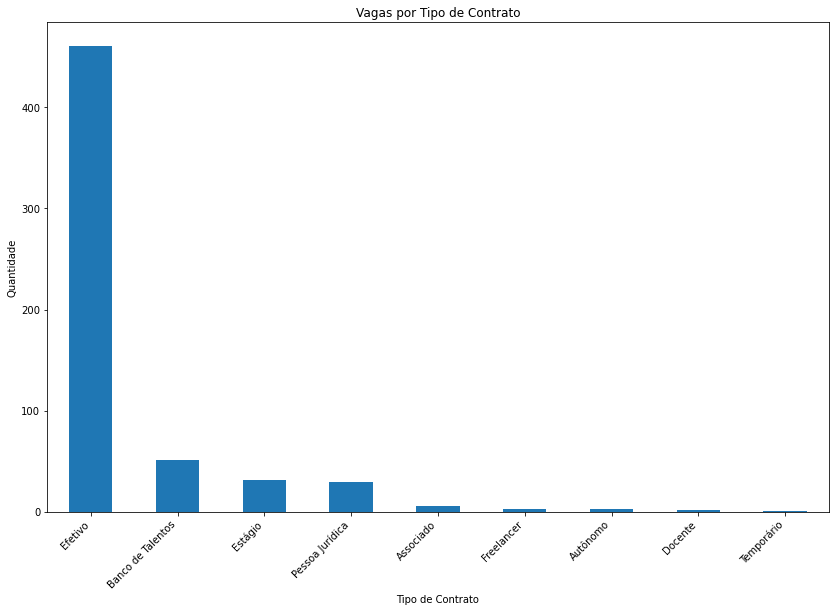

In [9]:
# Tipos de Contratos
plt.figure(figsize=(14, 9)) 
df['contrato'].value_counts().plot(kind='bar')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Quantidade')
plt.title('Vagas por Tipo de Contrato')
plt.savefig('graficos/VagasTipoContrato.png', facecolor='white')
plt.show()

### Vagas para Pessoas com Deficiência (PcD)
Do total de vagas analisadas, 77,3% são direcionadas a pessoas com deficiência. É importante mencionar que os 22,7% restantes têm dados não informados, o que pode indicar uma oportunidade para melhorar a coleta de informações nessa área.

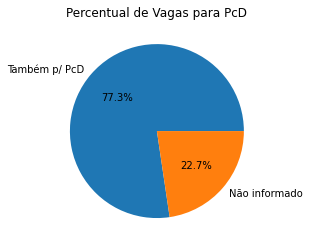

In [10]:
# Vagas com acessibilidade
df['pcd'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentual de Vagas para PcD')
plt.ylabel('')
plt.savefig('graficos/PercentualdeVagasparaPcD.png', facecolor='white')
plt.show() 

Entre as vagas remotas, 82% também oferecem oportunidades para PcD, demonstrando um esforço para deixar mais acessiviel.

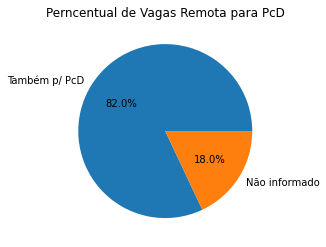

In [11]:
# Criando Data Frame somente com vagas remotas
df_remoto = df[df['modalidade'] == 'Remoto']

# Mostrando das vagas home office quantas aceitam PcD 
df_remoto['pcd'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Perncentual de Vagas Remota para PcD')
plt.ylabel('')
plt.savefig('graficos/PerncentualdeVagasRemotaparaPcD.png', facecolor='white')
plt.show() 

### Modalidade de Trabalho
Com relação à modalidade de trabalho, 67,8% das vagas são presenciais e 32,2% são remotas. Essa distribuição revela a preferência das empresas por terem colaboradores que possam estar presentes fisicamente em seus locais de trabalho.

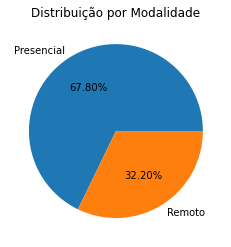

In [12]:
df['modalidade'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribuição por Modalidade')
plt.ylabel('')
plt.savefig('graficos/DistribuicaoporModalidade.png', facecolor='white')
plt.show()

### Top 10 Empresas com Mais Oportunidades
Ao analisar as empresas com mais vagas, o Itaú lidera, seguido por NAVA e Stefanini. Essas empresas demonstram um compromisso contínuo em oferecer oportunidades na área de dados.

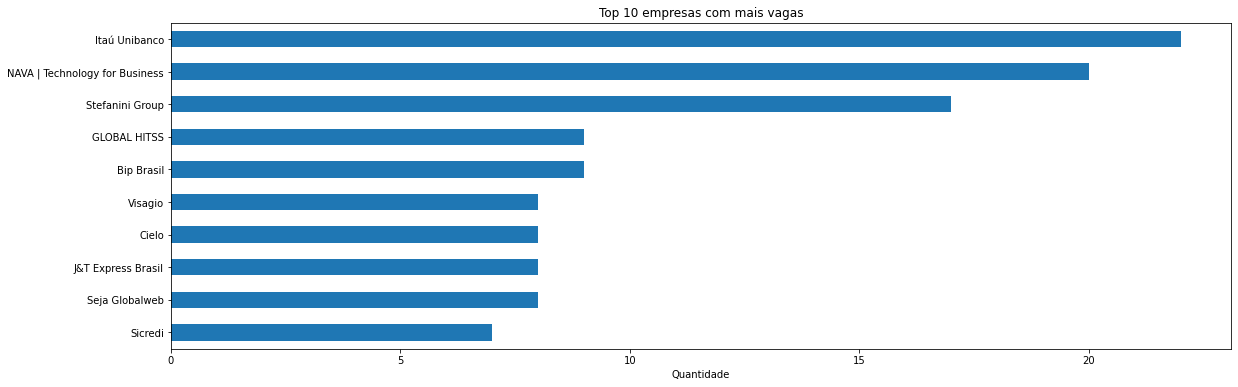

In [13]:
# top 10 empresas com mais oportunidades abertas
plt.figure(figsize=(19, 6))
df['empresa'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Quantidade')
plt.ylabel('')
plt.title('Top 10 empresas com mais vagas')
plt.savefig('graficos/Top10Empresas.png', facecolor='white')
plt.show()

### Top 10 Cidades com Mais Vagas Presenciais
São Paulo e Rio de Janeiro surgem como as principais cidades com vagas presenciais, refletindo o cenário econômico e populacional dessas regiões. Observamos que há uma porção significativa de dados não informados, sugerindo a importância de melhorias no preenchimento de informações por parte das empresas e/ou plataforma.

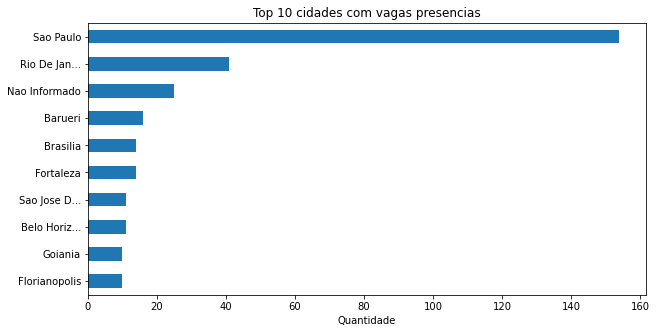

In [14]:
# Criando Data Frame somente com vagas presenciais
df_presencial = df[df['modalidade'] == 'Presencial']

# Top 10 cidades que vagas são presencias
plt.figure(figsize=(10, 5)) 
df_presencial['cidade'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Quantidade')
plt.ylabel('')
plt.title('Top 10 cidades com vagas presencias')
plt.savefig('graficos/Top10Cidades.png', facecolor='white')
plt.show()